<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement:" data-toc-modified-id="Problem-Statement:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement:</a></span></li><li><span><a href="#Importing-Packages" data-toc-modified-id="Importing-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Packages</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Feature-Distributions" data-toc-modified-id="Visualizing-Feature-Distributions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing Feature Distributions</a></span></li><li><span><a href="#Daily-Gross-Sales-Correlation-Heatmap" data-toc-modified-id="Daily-Gross-Sales-Correlation-Heatmap-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Daily Gross Sales Correlation Heatmap</a></span></li><li><span><a href="#Daily-Gross-Sales-(in-thousands)" data-toc-modified-id="Daily-Gross-Sales-(in-thousands)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Daily Gross Sales (in thousands)</a></span></li><li><span><a href="#ACF-&amp;-PACF-Plots" data-toc-modified-id="ACF-&amp;-PACF-Plots-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ACF &amp; PACF Plots</a></span></li></ul></li><li><span><a href="#ADF-Test-for-Stationarity" data-toc-modified-id="ADF-Test-for-Stationarity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ADF Test for Stationarity</a></span></li><li><span><a href="#Model-Prep" data-toc-modified-id="Model-Prep-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Prep</a></span></li><li><span><a href="#Model-Selection-with-AIC:" data-toc-modified-id="Model-Selection-with-AIC:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Selection with AIC:</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Conclusion-&amp;-Reccomendations" data-toc-modified-id="Conclusion-&amp;-Reccomendations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion &amp; Reccomendations</a></span><ul class="toc-item"><li><span><a href="#The-Bible:" data-toc-modified-id="The-Bible:-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>The Bible:</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Problem Statement:

I am a consultant hired by restaurant owners, since new management has taken over their costs have gone through the roof and now they are 25K in the red on average each month. In order for them to recoup their loss I need to figure out how to properly structure their budgets. I will create a SARIMAX predictive sales model to base my customized bugets from. My metric will be RMSE to gauge my model with because the output will be on the same scale as my data. A succesful model will output predictive sales values within a $500.00 range.

## Importing Packages

- model interpetation 
- coeffs on time lags

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import math



%matplotlib inline

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import itertools

import warnings
warnings.filterwarnings("ignore")

In [2]:
# #CREATE FUNCTION THAT READS IN CSV AND AND CLEANS DATA
# def data_reader_cleaner(df):
# # 1) read in csv
# data = pd.read_csv('./data/data_1.csv')
# # 2) reset_index
# data.reset_index(inplace=True)
# # 3)set colunms as row 0 
# data.columns = data.iloc[0]
# # 4) drop first and last columns
# data.drop([0,31], axis = 0, inplace = True)
# # 5) set index as date
#  data.set_index('Date', inplace = True)   
# 6) concats
# return df

In [4]:
data = pd.read_csv('./data/data_1.csv')

In [5]:
data_2 = pd.read_csv('./data/data_2.csv')

In [6]:
data_3 = pd.read_csv('./data/data_3.csv')

In [7]:
data_4 = pd.read_csv('./data/data_4.csv')

In [8]:
data_5 = pd.read_csv('./data/data_5.csv')

In [9]:
data.reset_index(inplace=True)

In [10]:
data_2.reset_index(inplace=True)

In [11]:
data_3.reset_index(inplace=True)

In [12]:
data_4.reset_index(inplace=True)

In [13]:
data_5.reset_index(inplace=True)

In [14]:
data.columns = data.iloc[0]

In [15]:
data_2.columns = data_2.iloc[0]

In [16]:
data_3.columns = data_3.iloc[0]

In [17]:
data_4.columns = data_4.iloc[0]

In [18]:
data_5.columns = data_5.iloc[0]

In [19]:
data_2.columns

Index(['Date', 'Day of the Week', 'Bill Count', 'Voids', 'Gross Sales',
       'Discounts', 'Net Sales', 'Menu Item Cost', 'Labor Cost', 'Margin'],
      dtype='object', name=0)

In [20]:
data.shape

(32, 10)

In [21]:
data_2.shape

(185, 10)

In [22]:
data_3.shape

(183, 10)

In [23]:
data_4.shape

(182, 10)

In [24]:
data_5.shape

(49, 10)

In [25]:
data.drop([0,31], axis = 0, inplace = True)

In [26]:
data_2.drop([0,184], axis = 0, inplace = True)

In [27]:
data_3.drop([0,182], axis = 0, inplace = True)

In [28]:
data_4.drop([0,181], axis = 0, inplace = True)

In [29]:
data_5.drop([0,48], axis = 0, inplace = True)

In [30]:
data.set_index('Date', inplace = True)

In [31]:
data_2.set_index('Date', inplace = True)

In [32]:
data_3.set_index('Date', inplace = True)

In [33]:
data_4.set_index('Date', inplace = True)

In [34]:
data_5.set_index('Date', inplace = True)

In [35]:
data_2

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
Date,,,,,,,,,
2018-07-01,Sunday,94,$268.00,"$5,132.03",$0.00,"$5,132.03",$0.00,"$1,316.44","$3,815.59"
2018-07-02,Monday,75,$154.00,"$3,904.01",$0.00,"$3,904.01",$0.00,$855.73,"$3,048.28"
2018-07-03,Tuesday,72,$61.00,"$3,555.00",$0.00,"$3,555.00",$0.00,$909.48,"$2,645.52"
2018-07-04,Wednesday,66,$115.00,"$3,027.00",$6.00,"$3,021.00",$0.00,$744.24,"$2,276.76"
2018-07-05,Thursday,58,$39.00,"$2,809.00",$0.00,"$2,809.00",$0.00,"$1,060.46","$1,748.54"
...,...,...,...,...,...,...,...,...,...
2018-12-27,Thursday,76,$89.00,"$4,706.00",$6.60,"$4,699.40",$114.00,$696.53,"$3,888.87"
2018-12-28,Friday,82,$100.00,"$4,895.00",$10.00,"$4,885.00",$72.00,$833.36,"$3,979.64"
2018-12-29,Saturday,111,$124.00,"$6,307.00",$0.00,"$6,307.00",$212.00,"$1,244.73","$4,850.27"


## Exploratory Data Analysis

In [36]:
data.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,30,30,30,30,30,30,30,30,30
unique,7,26,27,30,18,30,1,30,30
top,Saturday,103,$144.00,"$5,290.00",$0.00,"$4,478.00",$0.00,$996.80,"$3,625.38"
freq,5,3,2,1,13,1,30,1,1


In [37]:
data_2.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,183,183,183,183,183,183,183,183,183
unique,7,88,135,182,103,179,38,182,182
top,Sunday,82,$86.00,"$3,555.00",$0.00,"$6,029.00",$0.00,"$1,136.97","$3,048.28"
freq,27,8,5,2,70,3,86,2,2


In [38]:
data_2.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [39]:
data.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [40]:
data_3.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [41]:
data_4.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [42]:
data_5.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [43]:
data_2

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
Date,,,,,,,,,
2018-07-01,Sunday,94,$268.00,"$5,132.03",$0.00,"$5,132.03",$0.00,"$1,316.44","$3,815.59"
2018-07-02,Monday,75,$154.00,"$3,904.01",$0.00,"$3,904.01",$0.00,$855.73,"$3,048.28"
2018-07-03,Tuesday,72,$61.00,"$3,555.00",$0.00,"$3,555.00",$0.00,$909.48,"$2,645.52"
2018-07-04,Wednesday,66,$115.00,"$3,027.00",$6.00,"$3,021.00",$0.00,$744.24,"$2,276.76"
2018-07-05,Thursday,58,$39.00,"$2,809.00",$0.00,"$2,809.00",$0.00,"$1,060.46","$1,748.54"
...,...,...,...,...,...,...,...,...,...
2018-12-27,Thursday,76,$89.00,"$4,706.00",$6.60,"$4,699.40",$114.00,$696.53,"$3,888.87"
2018-12-28,Friday,82,$100.00,"$4,895.00",$10.00,"$4,885.00",$72.00,$833.36,"$3,979.64"
2018-12-29,Saturday,111,$124.00,"$6,307.00",$0.00,"$6,307.00",$212.00,"$1,244.73","$4,850.27"


In [44]:
merge=pd.concat([data,data_2,data_3,data_4,data_5])

In [45]:
merge.dtypes

0
Day of the Week    object
Bill Count         object
Voids              object
Gross Sales        object
Discounts          object
Net Sales          object
Menu Item Cost     object
Labor Cost         object
Margin             object
dtype: object

In [46]:
t = ["Voids", "Gross Sales", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin"]


In [47]:
merge[t] = merge[t].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [48]:
merge["Bill Count"] = merge["Bill Count"].astype(int)

In [49]:
merge = pd.concat([merge, pd.get_dummies(merge['Day of the Week'])], axis=1)

In [50]:
merge.drop('Day of the Week', axis = 1, inplace = True)

In [51]:
merge.sort_index(inplace = True)

In [52]:
x_cols = ["Voids", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin", "Bill Count"]
        

### Visualizing Feature Distributions

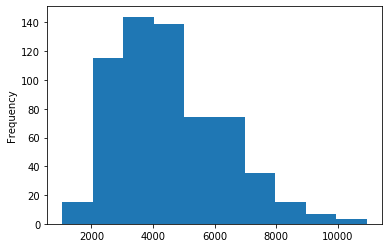

In [53]:
merge["Gross Sales"].plot(kind = "hist")
#log transform

#train model on log transform (log of gross sales)
#once fropecast is done take it and dexponeniate
# look at dists of feature if skwed then log transform as well

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1108fb950>,
      dtype=object)

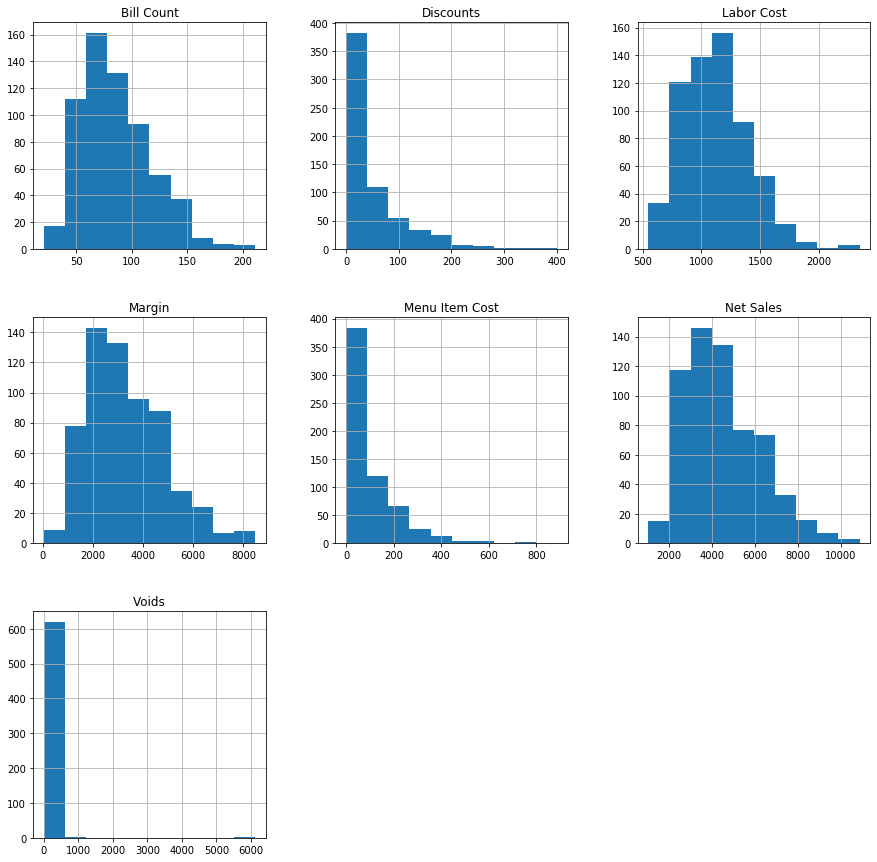

In [54]:
merge[x_cols].hist(figsize=(15, 15))

In [55]:
# merge[t].replace(0, .0001, inplace = True)

In [56]:
# log = np.log(merge[x_cols])

# log.hist(figsize=(15, 15))

### Daily Gross Sales Correlation Heatmap 

In [57]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    plt.figure(figsize=(12, 12))
    graph = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return graph

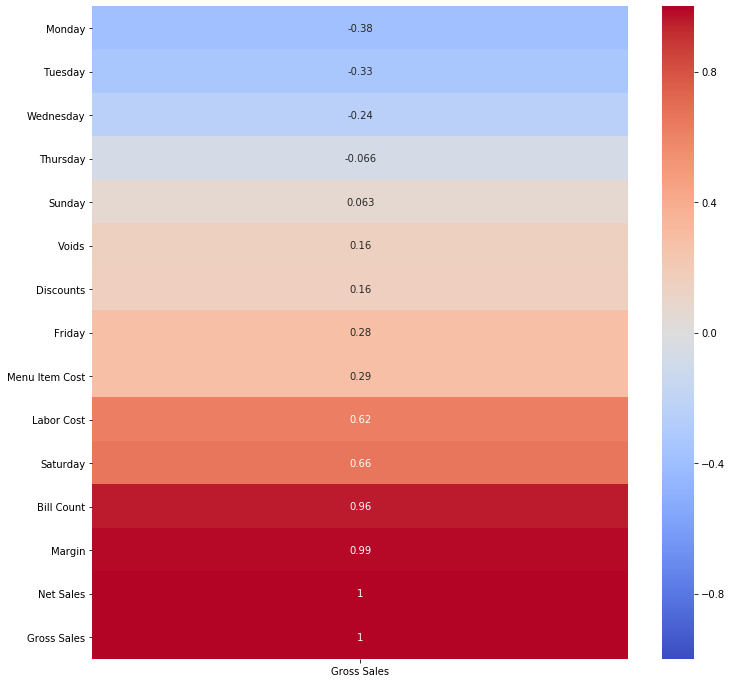

In [58]:
heatmap_numeric_w_dependent_variable(merge, "Gross Sales")

In [59]:
drop_corr_cols = ["Net Sales", "Margin"]

In [60]:
merge.drop(drop_corr_cols, axis = 1, inplace = True)

### Daily Gross Sales (in thousands)

In [61]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

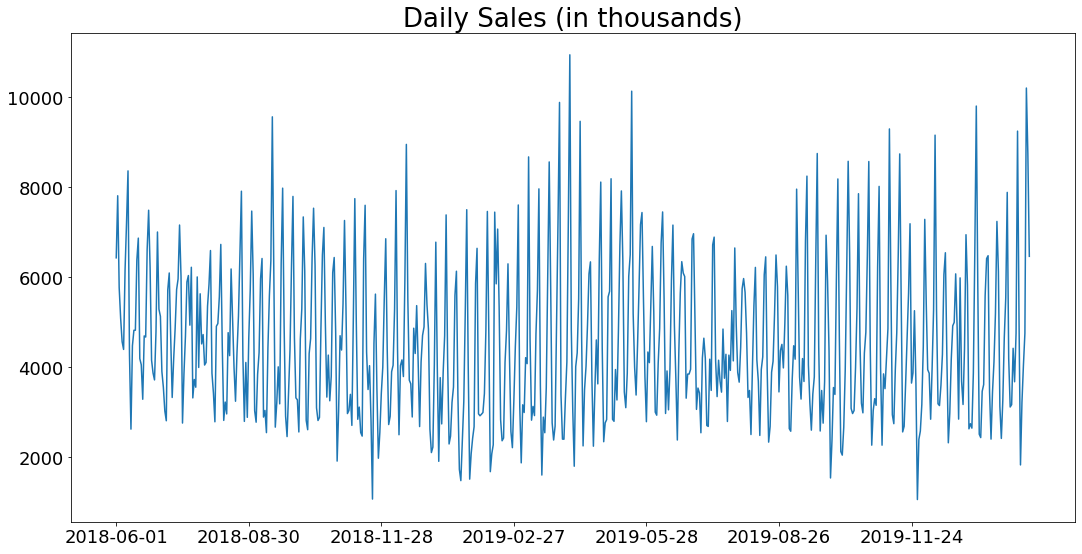

In [62]:
plot_series(merge, ['Gross Sales'], title = "Daily Sales (in thousands)", steps= 90)

### ACF & PACF Plots

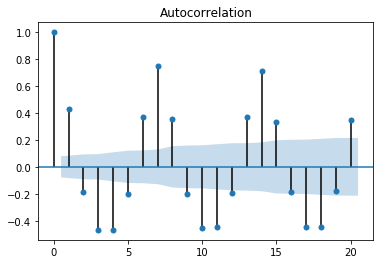

In [63]:
# Generate plot.
plot_acf(merge['Gross Sales'].dropna(), lags=20);

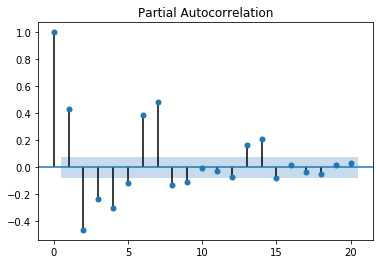

In [64]:
plot_pacf(merge['Gross Sales'].dropna(), lags=20);

## ADF Test for Stationarity

In [65]:
# Run ADF test on original (non-differenced!) data.
adfuller(merge['Gross Sales'])

(-4.413893331869135,
 0.00028047084978728866,
 14,
 606,
 {'1%': -3.4411869900487906,
  '5%': -2.866321181236609,
  '10%': -2.569316262893616},
 9994.277564875969)

In [66]:
# Code written by Joseph Nelson.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [67]:
# Run ADF test on original (non-differenced!) data.
interpret_dftest(adfuller(merge['Gross Sales']))

Test Statistic   -4.413893
p-value           0.000280
dtype: float64

## Model Prep

In [68]:
merge.index = pd.DatetimeIndex(merge.index).to_period('d')

In [71]:
621 *.35

217.35

In [72]:
X_test_exo = merge.iloc[:217,:] 

In [75]:
X_train_exo = merge.iloc[:404:]

In [76]:
X_train = X_train_exo.drop("Gross Sales", axis = 1)

In [77]:
X_test = X_test_exo.drop("Gross Sales", axis = 1)

In [78]:
y_train = X_train_exo['Gross Sales']

In [80]:
y_test = X_test_exo['Gross Sales']

## Model Selection with AIC: 

In [85]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [86]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = SARIMAX(y_train,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue
            
            
# #  #best params           

## Modeling

In [98]:
sarima = SARIMAX(endog = y_train,# inout the best params for this model
                 order = (1, 1, 1),              # (p, d, q)
                 seasonal_order = (1, 1, 1, 12),  # (P, D, Q, S)
                 exog = X_train)
# Fit SARIMA model
model = sarima.fit()

In [99]:
X_test.head()

,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2018-06-01,103,144.0,0.00,0.0,918.64,1,0,0,0,0,0,0
2018-06-02,142,478.0,0.00,0.0,1539.21,0,0,1,0,0,0,0
2018-06-03,110,185.0,52.75,0.0,1249.21,0,0,0,1,0,0,0
2018-06-04,108,28.0,0.00,0.0,1252.86,0,1,0,0,0,0,0
2018-06-05,68,134.0,18.00,0.0,842.49,0,0,0,0,0,1,0


In [100]:
y_train.tail()

Date
2019-07-06    4645.0
2019-07-07    4198.0
2019-07-08    2704.0
2019-07-09    2683.0
2019-07-10    4178.0
Freq: D, Name: Gross Sales, dtype: float64

In [101]:
X_train.tail()

,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2019-07-06,87,34.0,22.0,48.0,1257.62,0,0,1,0,0,0,0
2019-07-07,90,110.0,9.0,0.0,1148.75,0,0,0,1,0,0,0
2019-07-08,54,0.0,54.5,0.0,912.43,0,1,0,0,0,0,0
2019-07-09,59,11.0,63.5,228.0,688.60,0,0,0,0,0,1,0
2019-07-10,88,93.0,31.5,96.0,1043.75,0,0,0,0,0,0,1


In [102]:
preds = model.predict(start = len(y_train), end = len(y_train) + len(y_test) - 1, exog = X_test)

In [110]:
y_test.index = y_test.index.to_timestamp()

In [111]:
y_train.index = y_train.index.to_timestamp()

In [112]:
preds.index = preds.index.to_timestamp()

## Model Evaluation

### Baseline Model

In [126]:
merge["Gross Sales"].mean()

4563.761674718196

In [127]:
metrics.r2_score(y_test, preds)

0.9131270881192943

In [128]:
mse = mean_squared_error(y_test[0:len(y_test)], preds)
mse

210102.17182728768

In [129]:
math.sqrt(mse)

458.36903454235176

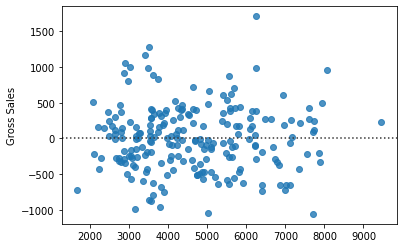

In [130]:
sns.residplot(preds, y_test)

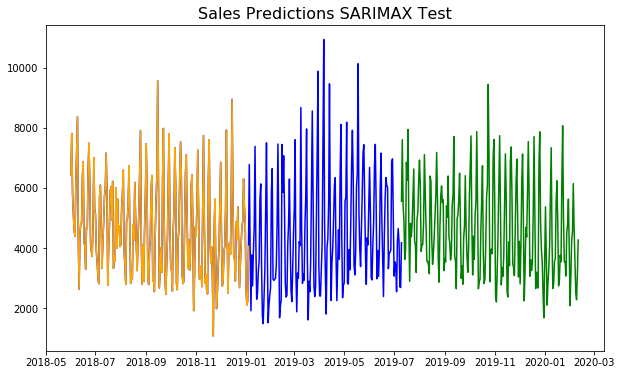

In [134]:
plt.figure(figsize=(10,6))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')
# plt.plot(future_forecast, color = 'black')

plt.title(label = 'Sales Predictions SARIMAX Test', fontsize=16)
plt.show();

In [135]:
X_test.tail()

,Bill Count,Voids,Discounts,Menu Item Cost,Labor Cost,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,
2018-12-31,72,123.0,0.00,84.0,1187.05,0,1,0,0,0,0,0
2019-01-01,45,105.0,0.00,0.0,767.30,0,0,0,0,0,1,0
2019-01-02,43,65.0,10.25,24.0,1176.95,0,0,0,0,0,0,1
2019-01-03,51,14.0,25.00,0.0,1008.75,0,0,0,0,1,0,0
2019-01-04,72,121.0,0.00,72.0,932.00,1,0,0,0,0,0,0


## Conclusion & Reccomendations

In [141]:
preds_weekly = preds[::7]

In [142]:
preds_weekly 

2019-07-10    5553.634324
2019-07-17    6252.654426
2019-07-24    5682.145506
2019-07-31    6252.506057
2019-08-07    7109.691255
2019-08-14    6395.949126
2019-08-21    5802.165369
2019-08-28    6066.162237
2019-09-04    5022.663094
2019-09-11    5789.603658
2019-09-18    5591.290039
2019-09-25    4740.047190
2019-10-02    6685.774324
2019-10-09    5514.528873
2019-10-16    5583.673389
2019-10-23    6094.073353
2019-10-30    7005.558917
2019-11-06    6211.654472
2019-11-13    5492.062773
2019-11-20    6844.931804
2019-11-27    6136.428307
2019-12-04    6215.479169
2019-12-11    5851.025095
2019-12-18    5154.252903
2019-12-25    6774.340160
2020-01-01    3490.041329
2020-01-08    5636.876850
2020-01-15    5547.821641
2020-01-22    6241.785582
2020-01-29    4782.526908
2020-02-05    6147.217838
Freq: 7D, dtype: float64

In [143]:
def calc_bud(x):
    [x for x in preds_weekly]
    return x * .20

In [144]:
custom_boh_labor_budget = calc_bud(preds_weekly)

In [145]:
custom_boh_labor_budget

2019-07-10    1110.726865
2019-07-17    1250.530885
2019-07-24    1136.429101
2019-07-31    1250.501211
2019-08-07    1421.938251
2019-08-14    1279.189825
2019-08-21    1160.433074
2019-08-28    1213.232447
2019-09-04    1004.532619
2019-09-11    1157.920732
2019-09-18    1118.258008
2019-09-25     948.009438
2019-10-02    1337.154865
2019-10-09    1102.905775
2019-10-16    1116.734678
2019-10-23    1218.814671
2019-10-30    1401.111783
2019-11-06    1242.330894
2019-11-13    1098.412555
2019-11-20    1368.986361
2019-11-27    1227.285661
2019-12-04    1243.095834
2019-12-11    1170.205019
2019-12-18    1030.850581
2019-12-25    1354.868032
2020-01-01     698.008266
2020-01-08    1127.375370
2020-01-15    1109.564328
2020-01-22    1248.357116
2020-01-29     956.505382
2020-02-05    1229.443568
Freq: 7D, dtype: float64

### The Bible:

● Total prime less than 60%

● Food cost 25 to 30%

● Labor cost BOH 15% to 20%

● Labor cost FOH 10 to 15%

● Profitmax15%

● 7 extreme low. 12% average 15 is excellent 

## References